# SHALINI S

# A Project for an Internship at "TECHNOHACKS EDUTECH"


# Task 7 : Heart Disease Prediction

# Dataset : "Heart.csv"

Importing modules

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Loading Dataset

In [5]:
dataset = pd.read_csv('Heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Exploratory Data Analysis (EDA)

1    526
0    499
Name: target, dtype: int64


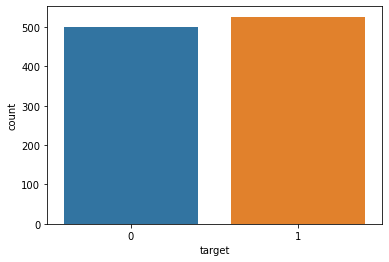

In [6]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [7]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 164.69
Percentage of patience with heart problems: 173.6


Analysing the 'Chest Pain Type' feature

In [8]:
dataset["cp"].unique()

array([0, 1, 2, 3], dtype=int64)

<AxesSubplot:xlabel='cp', ylabel='target'>

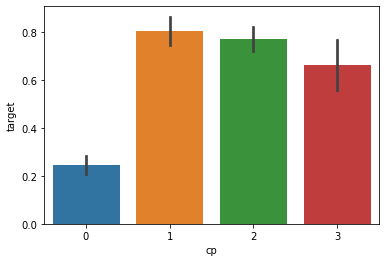

In [9]:
sns.barplot(x=dataset["cp"],y=y)

Analysing the FBS feature

In [10]:
dataset["fbs"].describe()

count    1025.000000
mean        0.149268
std         0.356527
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: fbs, dtype: float64

In [11]:
dataset["fbs"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='fbs', ylabel='target'>

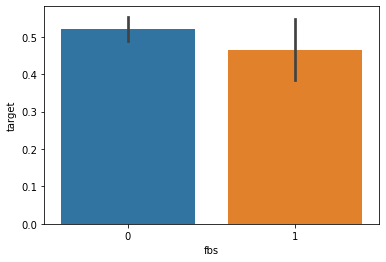

In [12]:
sns.barplot(x=dataset["fbs"],y=y)

Analysing the restecg feature

In [13]:
dataset["restecg"].unique()

array([1, 0, 2], dtype=int64)

<AxesSubplot:xlabel='restecg', ylabel='target'>

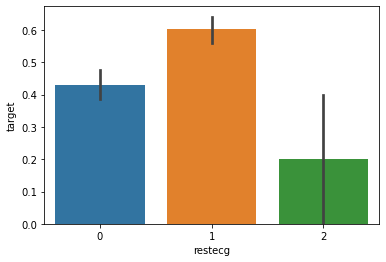

In [14]:
sns.barplot(x=dataset["restecg"],y=y)

Analysing the 'exang' feature

In [15]:
dataset["exang"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='exang', ylabel='target'>

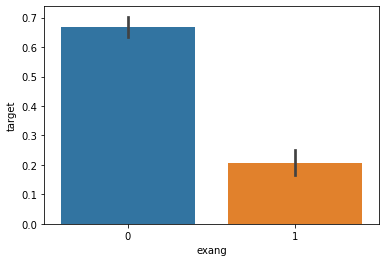

In [16]:
sns.barplot(x=dataset["exang"],y=y)

Analysing the Slope feature

In [17]:
dataset["slope"].unique()

array([2, 0, 1], dtype=int64)

<AxesSubplot:xlabel='slope', ylabel='target'>

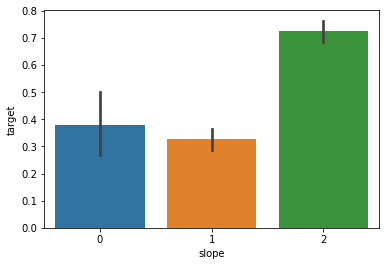

In [18]:
sns.barplot(x=dataset["slope"],y=y)

Analysing the 'ca' feature

number of major vessels (0-3) colored by flourosopy

In [19]:
dataset["ca"].unique()

array([2, 0, 1, 3, 4], dtype=int64)

<AxesSubplot:xlabel='ca', ylabel='count'>

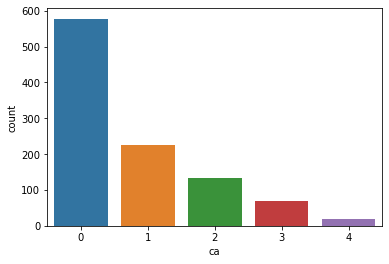

In [20]:
sns.countplot(dataset["ca"])

<AxesSubplot:xlabel='ca', ylabel='target'>

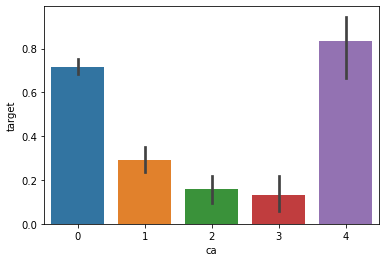

In [21]:
sns.barplot(x=dataset["ca"],y=y)

Analysing the 'thal' feature

In [22]:
dataset["thal"].unique()

array([3, 2, 1, 0], dtype=int64)

<AxesSubplot:xlabel='thal', ylabel='target'>

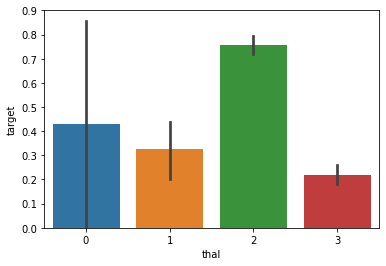

In [23]:
sns.barplot(x=dataset["thal"],y=y)

<AxesSubplot:xlabel='thal', ylabel='Density'>

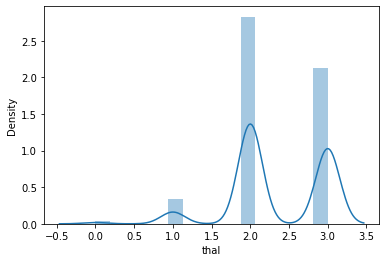

In [24]:
sns.distplot(dataset["thal"])

Train Test split

In [25]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [26]:
X_train.shape

(820, 13)

In [27]:
X_test.shape

(205, 13)

In [28]:
Y_train.shape

(820,)

In [29]:
Y_test.shape

(205,)

Model Fitting

In [30]:
from sklearn.metrics import accuracy_score

Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [32]:
Y_pred_lr.shape

(205,)

In [33]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 86.34 %


Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [35]:
Y_pred_nb.shape

(205,)

In [36]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.37 %


SVM

In [37]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [38]:
Y_pred_svm.shape

(205,)

In [39]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 83.9 %


K Nearest Neighbors

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [41]:
Y_pred_knn.shape

(205,)

In [42]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 72.2 %


Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [44]:
print(Y_pred_dt.shape)

(205,)


In [45]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0

for x in range(100):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [47]:
Y_pred_rf.shape

(205,)

In [48]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


XGBoost

In [49]:
pip install xgboost

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Home\\anaconda3\\Lib\\site-packages\\numpy\\~libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.




  Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3


In [50]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [51]:
Y_pred_xgb.shape

(205,)

In [52]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 100.0 %


Neural Network

In [61]:
pip install keras

In [1]:
from keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

C:\Users\Home\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [53]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
26/26 [==============================] - 5s 7ms/step - loss: 52.6391 - accuracy: 0.4890
Epoch 2/300
26/26 [==============================] - 0s 4ms/step - loss: 29.2671 - accuracy: 0.4890
Epoch 3/300
26/26 [==============================] - 0s 3ms/step - loss: 7.1173 - accuracy: 0.5293
Epoch 4/300
26/26 [==============================] - 0s 3ms/step - loss: 2.0940 - accuracy: 0.6122
Epoch 5/300
26/26 [==============================] - 0s 4ms/step - loss: 1.6735 - accuracy: 0.6024
Epoch 6/300
26/26 [==============================] - 0s 2ms/step - loss: 1.5115 - accuracy: 0.6244
Epoch 7/300
26/26 [==============================] - 0s 3ms/step - loss: 1.4470 - accuracy: 0.6317
Epoch 8/300
26/26 [==============================] - 0s 4ms/step - loss: 1.3670 - accuracy: 0.6354
Epoch 9/300
26/26 [==============================] - 0s 3ms/step - loss: 1.2972 - accuracy: 0.6512
Epoch 10/300
26/26 [==============================] - 0s 3ms/step - loss: 1.2434 - accuracy: 0.6500
Epoch 1

In [54]:
Y_pred_nn = model.predict(X_test)

7/7 [==============================] - 1s 9ms/step


In [55]:
Y_pred_nn.shape

(205, 1)

In [56]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [57]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11. 


The accuracy score achieved using Neural Network is: 86.34 %
